# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

## Monte Carlo Simulation for Optimization Search


We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Download and get Daily Returns
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [18]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [19]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2017-03-06,138.211326,33.293999,175.103956,846.61
2017-03-07,138.389868,33.303737,175.016632,846.02
2017-03-08,137.874080,33.128454,174.114285,850.50
2017-03-09,137.556672,33.177144,171.911780,853.00
2017-03-10,138.012946,33.362165,172.542453,852.46


In [20]:
daily_ret = stocks.pct_change(1)
daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2017-03-06,NaN,NaN,NaN,NaN
2017-03-07,0.001292,0.000292,-0.000499,-0.000697
2017-03-08,-0.003727,-0.005263,-0.005156,0.005295
2017-03-09,-0.002302,0.001470,-0.012650,0.002939
2017-03-10,0.003317,0.005577,0.003669,-0.000633


In [21]:
daily_ret2 = stocks.pct_change(2)
daily_ret2.head()

,aapl,cisco,ibm,amzn
Date,,,,
2017-03-06,NaN,NaN,NaN,NaN
2017-03-07,NaN,NaN,NaN,NaN
2017-03-08,-0.002440,-0.004972,-0.005652,0.004595
2017-03-09,-0.006021,-0.003801,-0.017740,0.008250
2017-03-10,0.001007,0.007055,-0.009028,0.002305


In [22]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.001269
cisco   -0.000374
ibm     -0.001616
amzn     0.001198
dtype: float64

In [23]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.289990,-0.009896,0.584953
cisco,0.289990,1.000000,0.138841,0.260278
ibm,-0.009896,0.138841,1.000000,0.063939
amzn,0.584953,0.260278,0.063939,1.000000


# Simulating Thousands of Possible Allocations

In [24]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2017-03-06,138.211326,33.293999,175.103956,846.61
2017-03-07,138.389868,33.303737,175.016632,846.02
2017-03-08,137.874080,33.128454,174.114285,850.50
2017-03-09,137.556672,33.177144,171.911780,853.00
2017-03-10,138.012946,33.362165,172.542453,852.46


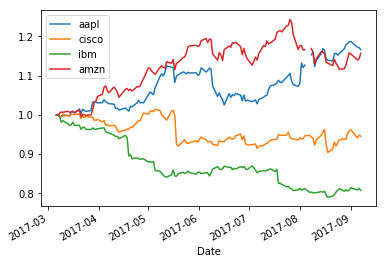

In [25]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [26]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2017-03-06,NaN,NaN,NaN,NaN
2017-03-07,0.001292,0.000292,-0.000499,-0.000697
2017-03-08,-0.003727,-0.005263,-0.005156,0.005295
2017-03-09,-0.002302,0.001470,-0.012650,0.002939
2017-03-10,0.003317,0.005577,0.003669,-0.000633


## Log Returns vs Arithmetic Returns

We will now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that.
Log returns are convenient to work with in many of the algorithms we will encounter.

For a full analysis of why we use log returns, check [this great article](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).


In [27]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2017-03-06,NaN,NaN,NaN,NaN
2017-03-07,0.001291,0.000292,-0.000499,-0.000697
2017-03-08,-0.003734,-0.005277,-0.005169,0.005281
2017-03-09,-0.002305,0.001469,-0.012730,0.002935
2017-03-10,0.003311,0.005561,0.003662,-0.000633


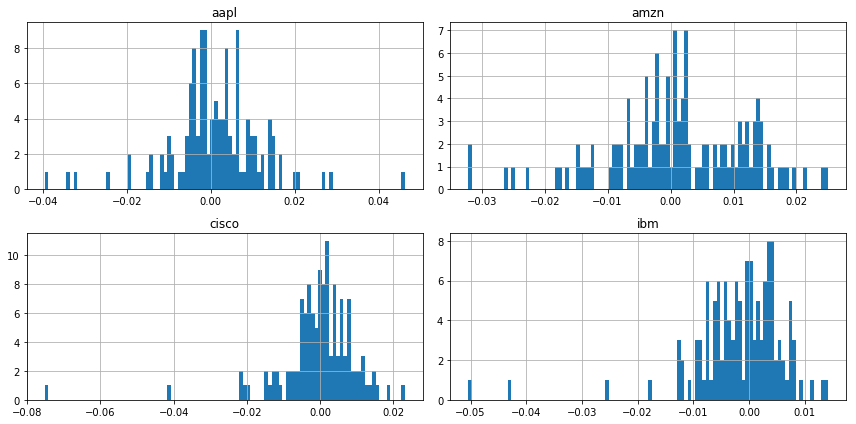

In [28]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [29]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,127.0,0.001031,0.011132,-0.039549,-0.003712,0.000969,0.006245,0.046169
cisco,129.0,-0.000433,0.010914,-0.075177,-0.003993,0.000586,0.005498,0.023051
ibm,129.0,-0.001652,0.008421,-0.050412,-0.005476,-0.000456,0.003386,0.014221
amzn,127.0,0.001130,0.010872,-0.032137,-0.004533,0.000885,0.009346,0.025025


In [30]:
log_ret.mean() * 252

aapl     0.259765
cisco   -0.109013
ibm     -0.416416
amzn     0.284712
dtype: float64

In [31]:
# Compute pairwise covariance of columns
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000124,0.000037,-0.000001,0.000072
cisco,0.000037,0.000119,0.000012,0.000031
ibm,-0.000001,0.000012,0.000071,0.000006
amzn,0.000072,0.000031,0.000006,0.000118


In [32]:
log_ret.cov()*252 # multiply by days

,aapl,cisco,ibm,amzn
aapl,0.031226,0.009222,-0.000323,0.018216
cisco,0.009222,0.030015,0.003134,0.007746
ibm,-0.000323,0.003134,0.017869,0.001466
amzn,0.018216,0.007746,0.001466,0.029784


# <font color='red'>Mark========================= </font>

## Single Run for Some Random Allocation

In [33]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum((log_ret.mean() * weights)*252)
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index([u'aapl', u'cisco', u'ibm', u'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.08461833267117706


Expected Volatility
0.1329441054705032


Sharpe Ratio
0.6364955585785761


Great! Now we can just run this many times over!

In [57]:
num_ports = 20000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [58]:
sharpe_arr.max()

1.7413124155113042

In [63]:
aa = sharpe_arr.argmax()

In [64]:
all_weights[aa,:]

array([5.07465579e-01, 2.28109252e-04, 3.45918501e-04, 4.91960393e-01])

In [65]:
max_sr_ret = ret_arr[aa]
max_sr_vol = vol_arr[aa]

# <font color='red'>============================== </font>

## Plotting the data

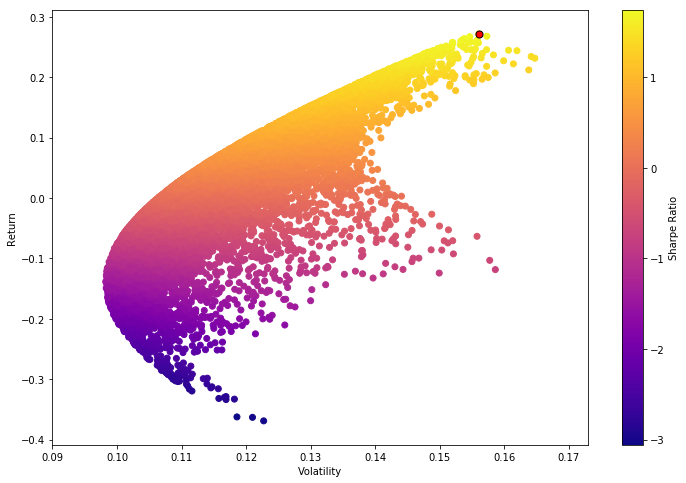

In [66]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Mathematical Optimization

There are much better ways to find good allocation weights than just guess and check! We can use optimization functions to find the ideal weights mathematically!

### Functionalize Return and SR operations

In [40]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [41]:
from scipy.optimize import minimize

To fully understand all the parameters, check out:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [42]:
help(minimize)  #using this function to calculate the maximize, max(sharp) that is min(-sharp)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized. Must be in the form
        ``f(x, *args)``. The optimizing argument, ``x``, is a 1-D array
        of points, and ``args`` is a tuple of any additional fixed parameters
        needed 

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

# <font color='red'>Mark========================= </font>

In [43]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [44]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [45]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [46]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [47]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [48]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [49]:
opt_results

     fun: -1.756908653023849
     jac: array([ 2.29477882e-04,  1.29067494e+00,  2.71448098e+00, -1.40845776e-04])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([3.80377820e-01, 0.00000000e+00, 2.63027447e-16, 6.19622180e-01])

In [50]:
opt_results.x

array([3.80377820e-01, 0.00000000e+00, 2.63027447e-16, 6.19622180e-01])

In [51]:
get_ret_vol_sr(opt_results.x)

array([0.27522252, 0.15665158, 1.75690865])

# <font color='red'>============================== </font>

# All Optimal Portfolios (Efficient Frontier)

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

Efficient Frontier http://www.investopedia.com/terms/e/efficientfrontier

# <font color='red'>Mark========================= </font>

In [52]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [53]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [54]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)  #and here we have two constrain.
    
    frontier_volatility.append(result['fun'])

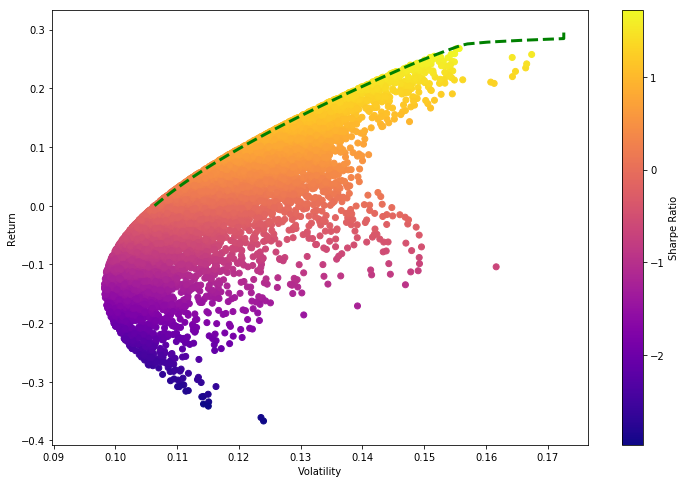

In [55]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# <font color='red'>=============================== </font>

# Great Job!